## A. Data Exploration

In [1]:
# import most essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
# import NAFLD dataset into a pandas dataframe
df = pd.read_csv("Desktop/archive/nafld1.csv")

In [3]:
# returns the first 5 rows 
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [4]:
# print summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


There are 17549 instances in the datatset. The attribute weight has only 12763 instances. The attribute  height has only 14381 instance. The attribute bmi has only 12588 instances.

All attributes are numerical.

In [5]:
# summarises the central tendency, dispersion, and shape of the dataset
df.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,17549.000000,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8780.106046,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.539328,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4389.000000,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8778.000000,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13171.000000,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


The average patient is 52.7 years old with a weight of 86.35 kg and a height of 169.43 cm. 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'case.id'}>,
        <AxesSubplot:title={'center':'futime'}>],
       [<AxesSubplot:title={'center':'status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

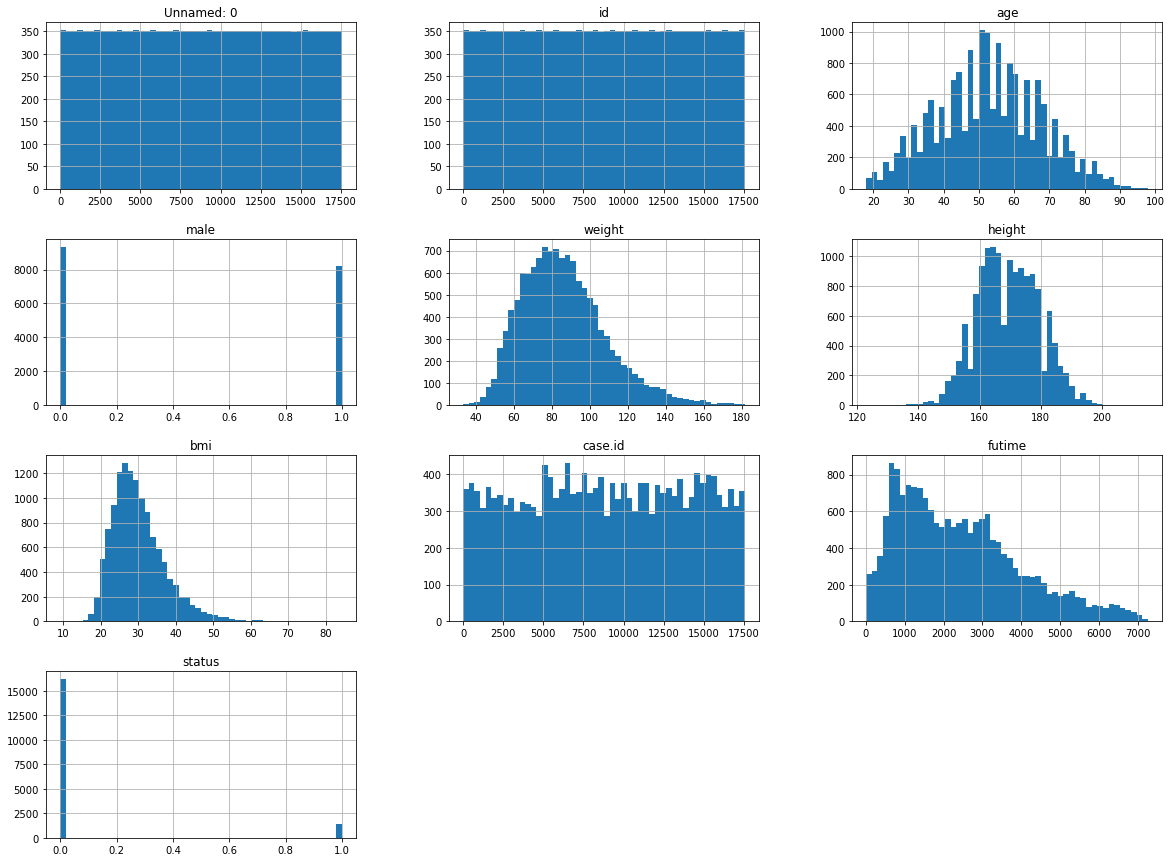

In [6]:
# histogram for each column
df.hist(bins=50, figsize=(20,15))

Inferences:
1. The attributes male and status are categorical, binary attributes.
2. The attributes have very different scales. The values for age ranges from 20 to 100. The values for height ranges from 120 to 200. The values for weigth ranges from 40 to 180. The values for bmi ranges from 15 to 55. We will discuss this later in this notebook when we explore feature scaling.
3. Some of the histograms extend much more to the right of the median than to the left. It is a bit harder for Machine learning algorithms to detect patterns. We will transform these attributes to ahve a more bell-shaped distributions.

In [7]:
# sums up the missing values for each column
df.isna().sum()

Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

Unnamed: 0     0.000000
id             0.000000
age            0.000000
male           0.000000
weight        27.272209
height        18.052311
bmi           28.269417
case.id        0.176648
futime         0.000000
status         0.000000
dtype: float64

## B. Data Visualization

**Number of males and females whose fatty liver data is stored in the dataset**

In [9]:
# returns the counts of unique values
df.male.value_counts()

0    9348
1    8201
Name: male, dtype: int64

There are 8201 male patients and 9348 female patients in the dataset.

<AxesSubplot:title={'center':'Number of males and females with fatty liver'}, ylabel='male'>

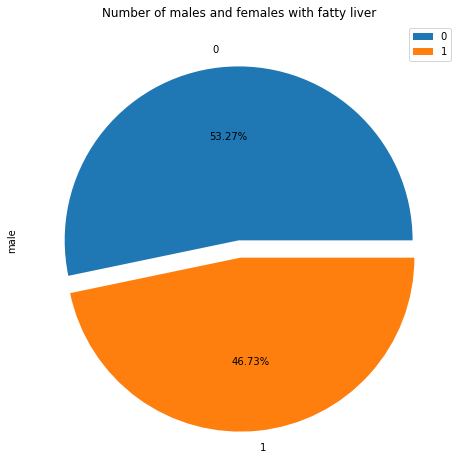

In [10]:
# make a pie chart for the counts of unique values
df["male"].value_counts(dropna=False).plot(kind="pie", 
                                           title = "Number of males and females with fatty liver",
                                           autopct= '%1.2f%%',
                                           explode=(0,0.1), 
                                           figsize=(12,8),
                                           legend = True)

46.73 % of the patients are male and 53.27 % are female.

**Count of the number of males and females who have fatty liver disease**

In [11]:
# returns the unique values for the attribute male of status is equal to 1
df.male[df.status==1].value_counts()

1    690
0    674
Name: male, dtype: int64

690 male patients and 674 female patients have fatty liver disease.

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

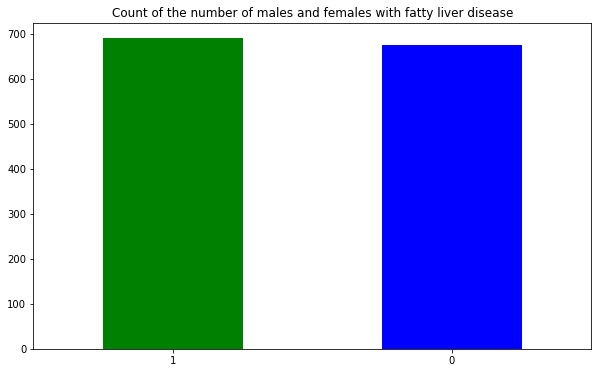

In [12]:
# make a bar chart for the attribute male if status is equal to 1
df.male[df.status==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with fatty liver disease")
plt.xticks(rotation=0)

In [13]:
# compues a simple cross tabulation of the two attributes male and status
pd.crosstab(df.status,df.male)

male,0,1
status,,
0,8674,7511
1,674,690


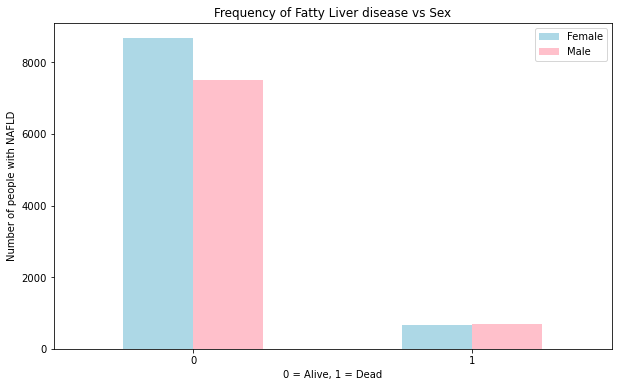

In [14]:
pd.crosstab(df.status,df.male).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Fatty Liver disease vs Sex")
plt.xlabel("0 = Alive, 1 = Dead")
plt.ylabel("Number of people with NAFLD")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

<AxesSubplot:xlabel='weight', ylabel='height'>

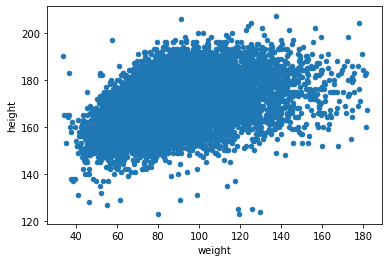

In [15]:
# scatter plot for weigh and height
df.plot(kind='scatter',x='weight',y='height')

Setting the alpha option to 0.1 makes it easier to visualize the places where there is a high density of data points.

<AxesSubplot:xlabel='weight', ylabel='height'>

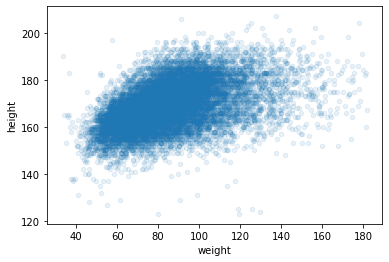

In [16]:
# scatter plot for weight and height with high density of data points
df.plot(kind="scatter", x="weight", y="height", alpha=0.1)

<AxesSubplot:xlabel='age', ylabel='futime'>

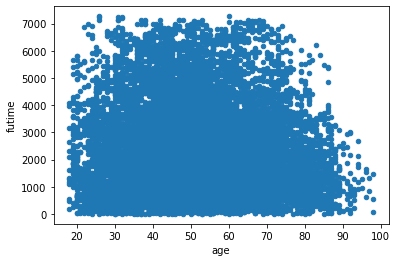

In [17]:
# scatter plot of age and futime
df.plot(kind='scatter',x='age',y='futime')

<AxesSubplot:xlabel='age', ylabel='futime'>

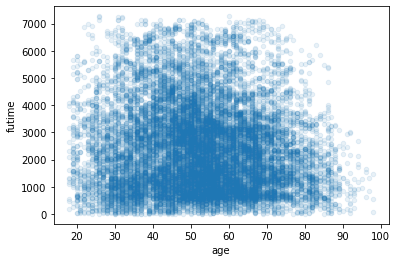

In [18]:
# scatter plot of age and futime with high density of data points
df.plot(kind="scatter", x="age", y="futime", alpha=0.1)

**Building a Correlation Matrix**

In [19]:
# computes pairwise correlation of columns with perason correlation coefficient
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
Unnamed: 0,1.000000,-0.009916,-0.288309,0.014677,-0.043366,0.024988,-0.061889,0.005432,-0.215062,-0.122244
id,-0.009916,1.000000,-0.004537,-0.000168,0.007619,-0.006990,0.013306,0.206172,-0.011091,-0.005619
age,-0.288309,-0.004537,1.000000,-0.051238,-0.094175,-0.179095,-0.016555,-0.028272,-0.087784,0.325870
male,0.014677,-0.000168,-0.051238,1.000000,0.343730,0.691512,0.023878,0.011826,-0.020314,0.022427
weight,-0.043366,0.007619,-0.094175,0.343730,1.000000,0.449049,0.874545,0.000476,-0.006841,-0.035718
height,0.024988,-0.006990,-0.179095,0.691512,0.449049,1.000000,-0.024745,0.013001,0.009284,-0.065086
bmi,-0.061889,0.013306,-0.016555,0.023878,0.874545,-0.024745,1.000000,-0.007573,-0.005195,-0.000489
case.id,0.005432,0.206172,-0.028272,0.011826,0.000476,0.013001,-0.007573,1.000000,-0.004949,-0.017782
futime,-0.215062,-0.011091,-0.087784,-0.020314,-0.006841,0.009284,-0.005195,-0.004949,1.000000,-0.069584
status,-0.122244,-0.005619,0.325870,0.022427,-0.035718,-0.065086,-0.000489,-0.017782,-0.069584,1.000000


<AxesSubplot:>

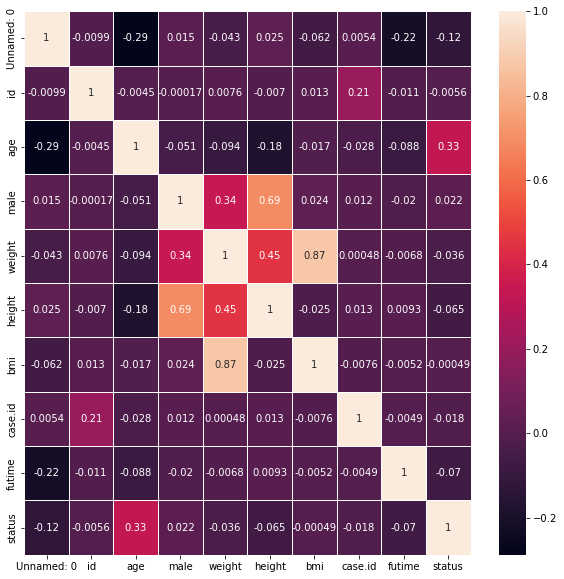

In [20]:
# plots rectangular data as a color-encoded matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)

1. The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation. For example, the height attribute has a positive correlation with the attribute male.
2. When the coefficient is close to –1, it means that there is a strong negative correlation. 

## Data Preparation

In [21]:
# fills NA/NaN values
df['weight'].fillna(df['weight'].median(), inplace=True)

In [22]:
# fills NA/NaN values
df['height'].fillna(df['height'].median(), inplace=True)

In [23]:
# fills NA/NaN values
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [24]:
# drops columns from the data frame
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,id,age,male,weight,height,bmi,case.id,futime,status
17544,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,17564,59,0,57.3,169.0,28.875884,16164.0,5081,0
17547,17565,61,0,83.9,169.0,28.875884,17276.0,3627,1
17548,17566,69,1,94.1,180.0,29.204650,2017.0,2744,0


In [25]:
# drops columns from the data frame
df.drop('case.id', axis=1, inplace=True)
df.tail()

,id,age,male,weight,height,bmi,futime,status
17544,17562,46,0,53.0,161.0,20.501023,1894,0
17545,17563,52,1,111.8,154.0,47.335905,3841,0
17546,17564,59,0,57.3,169.0,28.875884,5081,0
17547,17565,61,0,83.9,169.0,28.875884,3627,1
17548,17566,69,1,94.1,180.0,29.204650,2744,0


In [26]:
# drops columns from the data frame
df.drop('id', axis=1, inplace=True)
df.tail()

,age,male,weight,height,bmi,futime,status
17544,46,0,53.0,161.0,20.501023,1894,0
17545,52,1,111.8,154.0,47.335905,3841,0
17546,59,0,57.3,169.0,28.875884,5081,0
17547,61,0,83.9,169.0,28.875884,3627,1
17548,69,1,94.1,180.0,29.204650,2744,0


In [27]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
feat=['age', 'male','weight', 'height', 'bmi','futime']
# fits to data and transforms it
df[feat] = scal.fit_transform(df[feat])
# shows the first five column of the data frame
df.head()

,age,male,weight,height,bmi,futime,status
0,0.294820,-0.936643,-1.352042,-0.692292,-1.169193,2.447849,0
1,0.974071,-0.936643,-0.804577,-0.147732,-0.805188,-1.135811,0
2,0.023119,1.067643,1.058910,1.812685,0.119228,-0.398990,0
3,0.226894,1.067643,1.243153,0.070092,1.343575,0.465615,0
4,1.041996,1.067643,-0.093925,-0.038820,-0.142628,-0.365296,1


**Creating Features and Target variable**

In [28]:
# drop target variable status from the feature set
X=df.drop("status",axis=1).values
Y=df.status.values

**Splitting the data into train and test sets**

In [29]:
from sklearn.model_selection import train_test_split
# splits data frame into random train and test subsets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

**Create a function for evaluating metrics**

In [30]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
    # accuracy classification score
    acc=accuracy_score(Y_test,Y_pred)
    # computes recall
    rcl=recall_score(Y_test,Y_pred)
    # computes f1 score
    f1=f1_score(Y_test,Y_pred)
    
    metric_dict={'accuracy': round(acc,3),
                 'recall': round(rcl,3),
                 'F1 score': round(f1,3), 
              }
    
    return print(metric_dict)

## C. Building a Model

**Fitting and Comparing different Models**

In [31]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.929, 'recall': 0.152, 'F1 score': 0.23}


In [32]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.931, 'recall': 0.078, 'F1 score': 0.135}


In [33]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.931, 'recall': 0.213, 'F1 score': 0.301}


In [34]:
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.932, 'recall': 0.053, 'F1 score': 0.098}


In [35]:
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

{'accuracy': 0.928, 'recall': 0.193, 'F1 score': 0.272}


In [36]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                                     'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 
                           'Accuracy': [LR_score*100,RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,93.076923
1,Random Forest,93.133903
2,K-Nearest Neighbour,92.934473
3,Support Vector Machine,93.190883
4,XGBoost,92.849003


**Looking at the evaluation metrics for our best model**

In [37]:
print(" Best evaluation parameters achieved with SVC:") 
evaluation(Y_test,SVC_Y_pred)

 Best evaluation parameters achieved with SVC:
{'accuracy': 0.932, 'recall': 0.053, 'F1 score': 0.098}


<AxesSubplot:title={'center':'Final metric evaluation'}>

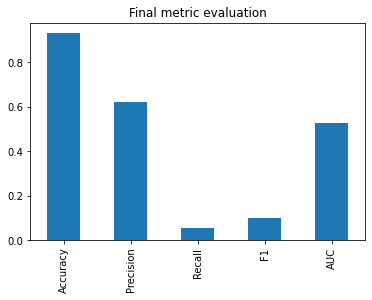

In [38]:
final_metrics={'Accuracy': SVC_clf.score(X_test,Y_test),
               'Precision': precision_score(Y_test,SVC_Y_pred),
               'Recall': recall_score(Y_test,SVC_Y_pred),
               'F1': f1_score(Y_test,SVC_Y_pred),
               'AUC': roc_auc_score(Y_test,SVC_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False)

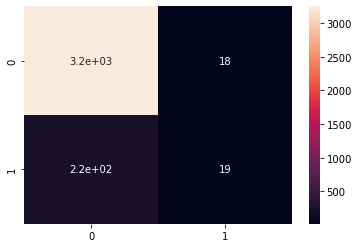

In [39]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,LR_Y_pred),annot=True,cbar=True)

**Let's save our model using pickle**

In [40]:
import pickle as pkl
# returns the pickled representation of the object as a bytes object
pkl.dump(LR_clf,open("final_model.p","wb"))

In [41]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

1.3.0


In [42]:
%%writefile healthy-liver-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import StandardScaler

scal=StandardScaler()

#Reads the pickled version of the object from the open file object
model=pkl.load(open("final_model.p","rb"))

st.set_page_config(
    page_title="Learn to predict the risk of getting fatty liver disease!",
    page_icon="🏥",
    layout="centered",
    initial_sidebar_state="expanded",
    menu_items={
        'About': "This is an app to predict your risk of getting non-alcohol fatty liver disease!"
    })

def preprocess(age,male,weight,height,bmi,futime):  
    # Pre-processing user input   
    if male=="male":
        male=1 
    else: 
        male=0  
    user_input=[age,male,weight,height,bmi,futime]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

# front end elements of the web page 
html_temp = """ 
    <div> 
    <h1 style ="color:black;text-align:center;">Healthy Liver App</h1> 
    </div> 
    """
      
st.markdown(html_temp, unsafe_allow_html = True) 

age=st.selectbox ("Age",range(1,100,1))
male = st.radio("Select sex: ", ('male', 'female'))
weight=st.selectbox('Weight in kg',range(1,300,1))
height=st.selectbox('Height in cm',range(1,200,1))
bmi=st.selectbox('BMI',range(1,50,1))
futime=st.selectbox ("Time to death or last follow up",range(1,10000,1))

pred=preprocess(age,male,weight,height,bmi,futime)

if st.button("Predict"):    
    if pred[0] == 1:
        st.error('Warning! You have high risk of dying from fatty liver!')
    else:
        st.success('You have lower risk of dying from fatty liver!')
        
st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of dying from fatty liver.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy liver")
st.sidebar.info("Don't forget to rate this app")

feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
    st.header("Thank you for rating the app!")

st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 

Overwriting healthy-liver-app.py
